<a href="https://colab.research.google.com/github/komorimasashi/kakuritsu_toukei_1/blob/main/2_mean_variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 代表値とばらつきの指標

##概要

**目的**

平均値，中央値などの代表値を求める．またばらつきの指標として標準偏差を求める．


**今回使うライブラリ**

*   NumPy：数値・ベクトル・行列演算ライブラリ
*   SciPy: 高度な科学(science)計算を行うためのライブラリ
*   Pandas： データの集計や可視化を統合的に行うライブラリ

Numpyは配列(リスト)計算を高速にするためのPythonのライブラリです．Pythonには標準の機能としてリスト型変数がありますが、Numpyはこれを強化したNumpy配列というものを使います．NumpyはCで実装されており，処理が高速なので，大量のデータを扱うデータサイエンスの領域では必須のライブラリです．


##Numpyの基本的な使い方

（ここは興味のない人は飛ばしてもらっていいです）

###Numpyライブラリの読み込み
ライブラリを読み込んで使える状態にするには，**import** を使います．**import** モジュール名（numpy）でモジュールを読み込んでおり、**as** で短い名前をつけます（ここではnp；numpyをnpと省略するのは一般的なルールなので勝手な略称をつけないように）．これで「np」という名前をつければNumpyの関数を使うことができるようになりました．

In [ ]:
# numpyモジュールの読み込み
import numpy as np

まずは，1から10までの配列を作成してみます．np.と後にarrayをつけることで，Numpyのインスタンスとして配列sample_numpy_data を作っています．sample_numpy_data はNumpyのインスタンスなので，Numpyの持つ様々な機能（メソッドと言われます）を使うことができます．

(数字が綺麗に並んでないですが、後から並び替えをするためにわざと作っています)．

In [ ]:
# 配列の作成
sample_numpy_data = np.array([9,2,3,4,10,6,7,8,1,5])
sample_numpy_data

array([ 9,  2,  3,  4, 10,  6,  7,  8,  1,  5])

これはnumpy.ndarrayという型であることがわかります

In [ ]:
#nd　　arrayはnumpyの多次元データを扱う型
type(sample_numpy_data)

numpy.ndarray

###Numpyのメソッドを使う

dtype, ndim, sizeといったNumpyのメソッド（クラスで定義されている処理）を使うことで，データの中身を見ることができます．

使い方は，「インスタンス名.（ピリオド）メソッド」という書き方をします．

In [ ]:
# データの型
print(sample_numpy_data.dtype)
# 次元数
print(sample_numpy_data.ndim)
# 要素数
print(sample_numpy_data.size)

int64
1
10


次にsort()というメソッドを使ってみましょう．sort()は並び替えの処理を行います．並び替え処理を行った後は，数字が昇順に整列されていることを確認しましょう．

In [ ]:
print("そのまま：",sample_numpy_data)

# ソート
sample_numpy_data.sort()

print("ソート後：",sample_numpy_data)


そのまま： [ 9  2  3  4 10  6  7  8  1  5]
ソート後： [ 1  2  3  4  5  6  7  8  9 10]


In [ ]:
# 最小値
print("Min:",sample_numpy_data.min())
# 最大値
print("Max:",sample_numpy_data.max())
# 合計
print("Sum:",sample_numpy_data.sum())
# 積み上げ
print("Cum:",sample_numpy_data.cumsum())

Min: 1
Max: 10
Sum: 55
Cum: [ 1  3  6 10 15 21 28 36 45 55]


###行列を扱う

In [ ]:
#まずは要素が 1, 2, 3 である長さ 3 のベクトル
a = np.array([1, 2, 3])
print(a)

[1 2 3]


次にこんな行列を作ってみましょう
\begin{pmatrix}
1 & 2 &3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{pmatrix}


In [ ]:
b = np.array([[1, 2, 3], [4, 5,6],[7, 8, 9]])
print(b)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


numpy.ndarrayを作る方法はnp.array()以外にも色々あります．
例えば，np.zeros() はそれぞれ要素が全て 0 である0行列を生成する関数です．

In [ ]:
#すべての要素が0の行列
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

np.identity()は単位行列を生成する関数です．n は行列の大きさを表します． 例えば3 と指定すると，単位行列は正方行列なので，大きさ 3×3 の単位行列が生成されます．

In [ ]:
#単位行列
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
#数列を生成する
np.arange(9)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
#後ろにさらにメソッドを重ねることもできます
#reshapeは行列に変換するメソッドです
np.arange(9).reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
#さらにこの行列のある部分だけを取り出すこともできます
#0行目だけを取り出す（pythonは0からカウントするので実際には1行目）
print(np.arange(9).reshape(3,3)[0,:])

[0 1 2]


In [ ]:
#0列目だけを取り出す（実際には1列目）
print(np.arange(9).reshape(3,3)[:,0])

[0 3 6]


In [ ]:
#"0:2"(コロン)は「0番目の要素から２番目の要素の手前(つまり１番目)まで取り出す
print(np.arange(9).reshape(3,3)[:,0:2])

[[0 1]
 [3 4]
 [6 7]]


In [ ]:
#行列を生成する際に変数の型を指定することができます
a = np.array([1, 2, 3], dtype=float)
print("aの型は",a.dtype)

b = np.array([1, 2, 3], dtype=int)
print("bの型は",b.dtype)

aの型は float64
bの型は int64


###行列の演算


行列の掛け算では，np.dotを使います．なお，*を使うとそれぞれの要素を掛け算するだけなので，間違えないように注意しましょう

In [ ]:
# 行列の積
sample_multi_array_data1 = np.arange(0,9).reshape(3,3)
sample_multi_array_data2 =  np.arange(9,18).reshape(3,3)
np.dot(sample_multi_array_data1,sample_multi_array_data2)

array([[ 42,  45,  48],
       [150, 162, 174],
       [258, 279, 300]])

In [ ]:
# 要素の積(注：行列の掛け算ではありません)
sample_multi_array_data1 * sample_multi_array_data2

array([[  0,  10,  22],
       [ 36,  52,  70],
       [ 90, 112, 136]])

###list型からnp.array型への変換

In [ ]:
data0 = range(10) # 注意

data1 = []
for x in range(10):
    data1.append(x)

data2 = [x for x in range(10)] # Python 特有の書き方
data3 = np.array(range(10)) # range => numpy.ndarray 変換
data4 = np.array(data2) # list => numpy.ndarray 変換

print (type(data0), data0)
print (type(data1), data1)
print (type(data2), data2)
print (type(data3), data3)
print (type(data4), data4)

<class 'range'> range(0, 10)
<class 'list'> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
<class 'list'> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
<class 'numpy.ndarray'> [0 1 2 3 4 5 6 7 8 9]
<class 'numpy.ndarray'> [0 1 2 3 4 5 6 7 8 9]


##SciPyの基本的な使い方


（ここは興味のない人は飛ばしてもらっていいです）

Scipyは科学技術計算をするためのモジュールで，統計的な処理を含む多様な数学的演算ができます．Scipyの中には様々なサブモジュールがあります．サブモジュールを使うには下のように「.」（ピリオド）でつないでサブモジュールを指定します．下はサブモジュールの一例です．

*   scipy.stats: 統計
*   scipy.linalg: 線形代数
*   scipy.optimize: 最適化
*   scipy.signal: 信号処理
*   等々

練習として，ここではscipy.linalgを使って線形代数の逆行列や固有値を求めてみましょう．

###Scipyライブラリの読み込み

In [ ]:
# Scipyのモジュールをspとして読み込む
import scipy as sp

# 線形代数用のサブモジュールを linalg（linear algebra（線形代数）の略ね）として使えるようにする
from scipy import linalg
# 統計分析用のサブモジュールをstats（statistics（統計学）の略ね）として使えるようにする
from scipy import stats

###Scipy.lialgのメソッドを使う

$
  A = \left(
    \begin{array}{ccc}
      1 & 2 & 3 \\
      1 & 3 & 2 \\
      3 & 1 & 2
    \end{array}
  \right)
$

行列Aに対して行列式（determinant; いわゆる「$ad-bc$」です）を求めてみましょう

scipy.linalg.detを使います．

In [ ]:
# サンプルデータ作成
sample_matrix_data = np.array([[1,2,3],[1,3,2],[3,1,2]])

# 行列式
print(linalg.det(sample_matrix_data))

-12.0


次は逆行列

In [ ]:
# 逆行列
print(linalg.inv(sample_matrix_data))

[[-0.33333333  0.08333333  0.41666667]
 [-0.33333333  0.58333333 -0.08333333]
 [ 0.66666667 -0.41666667 -0.08333333]]


試しに，行列とその逆行列をnp.dot()関数を使ってかけ合わせてみましょう．

ちゃんと単位行列になりますね？

In [ ]:
np.dot(sample_matrix_data, linalg.inv(sample_matrix_data))

array([[ 1.00000000e+00, -1.11022302e-16, -2.77555756e-17],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 2.22044605e-16, -1.11022302e-16,  1.00000000e+00]])

固有値と固有ベクトルも簡単に求められます

In [ ]:
# 固有値と固有ベクトル（ linalg.eig()関数は戻り値が２つあることに注意しよう）
eig_value, eig_vector = linalg.eig(sample_matrix_data)

# 固有値と固有ベクトル
print("固有値")
print(eig_value)
print("固有ベクトル")
print(eig_vector)

固有値
[ 6.        +0.j -1.41421356+0.j  1.41421356+0.j]
固有ベクトル
[[-0.57735027 -0.72236645  0.16041816]
 [-0.57735027 -0.14290228 -0.81090869]
 [-0.57735027  0.67658381  0.56275492]]


###Scipy.statsのメソッドを使う
まだ推測統計学を学んでいない皆さんには早いかもしれないが，Scipy.statsではさまざまな統計分析に関わ様々な関数を揃えている．

まずはテストの点数X={10, 20, 30, 40, 50}からそれぞれの受験者の「偏差値」を求めてみよう．

$偏差値=zスコア×10 + 50$

In [ ]:
x = np.array([10, 20, 30, 40, 50])
stats.zscore(x)*10 + 50

array([35.85786438, 42.92893219, 50.        , 57.07106781, 64.14213562])

正規分布の確率密度関数(probability density function, PDF)を書くことも簡単にできる．

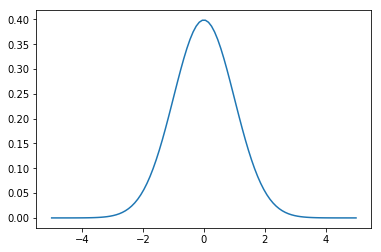

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(-5,5,100)
p = stats.norm.pdf(x)
plt.plot(x,p)
plt.show()

##代表値とばらつきの指標

###Iris flower data setのヒストグラムと記述統計量

In [ ]:
import pandas as pd

#scikit-learnライブラリからデータセットだけを用いる
from sklearn import datasets

#Irisデータを読み込みます
iris = datasets.load_iris()

#Iris.dataには花の特徴量がある．iris.targetに'target'と名前をつけて一つのDataFrameに統合
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]


####Iris flower data setのヒストグラムで見る位置とばらつきの違い

target
setosa        AxesSubplot(0.125,0.125;0.775x0.755)
versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
virginica     AxesSubplot(0.125,0.125;0.775x0.755)
Name: petal length (cm), dtype: object

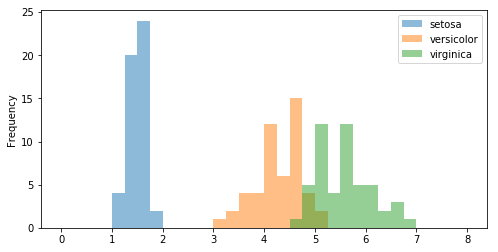

In [ ]:
#dfを'target'（品種）でグルーピングして，そのグルーピングしたもののうち
#'petal length (cm)'（花弁の長さ）だけを抜き出して，そのヒストグラムを重ねる

df.groupby('target')['petal length (cm)'].plot(bins=32, range=(0, 8), alpha=0.5, figsize=(8,4), kind='hist',  legend=True)

####Iris flower data setの記述統計量

pd.describe()メソッドで記述統計量を求める．
*   count: 各ターゲットのサンプルサイズ
*   mean: 平均値: $$\overline{x}=\frac{1}{N}\sum_{i=1}^Nx_i $$
*   std: standard deviation（標準偏差）: $$\sigma = \sqrt{\frac{1}{N}\sum_{i=1}^N (x_i - \overline{x})^2}$$
*   min: 最小値
*   25%: 第1四分位偏差（25パーセンタイル）
*   50%: median（メディアン；中央値）
*   75%: 第3四分位偏差（75パーセンタイル）
*   max: 最大値





In [ ]:
df.groupby('target')['petal length (cm)'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
setosa,50.0,1.462,0.173664,1.0,1.4,1.50,1.575,1.9
versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


###範囲と四分位偏差と標準偏差の違い

まず正規乱数を発生させて仮想データを作ってみます

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(0)
#randnは標準正規分布（平均=0, 分散=1）に従う乱数を所定の個数発生させる関数
x = np.random.randn(100)

####範囲

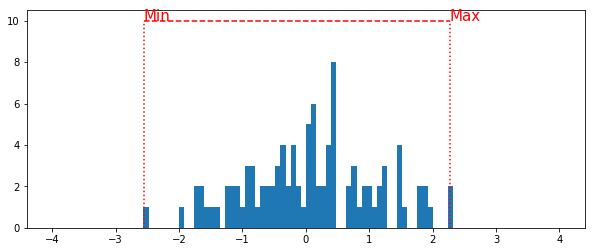

In [ ]:
#(-5,5)の区間を100分割した区間でヒストグラムを書く

plt.figure(figsize=(10,4))
plt.hist(x, bins=100,range=(-4,4))

plt.vlines(x.min(), 0, 10, "red", linestyles='dotted')
plt.vlines(x.max(), 0, 10, "red", linestyles='dotted')
plt.text(x.min(), 10, "Min", size = 15, color = "red")
plt.text(x.max(), 10, "Max", size = 15, color = "red")
plt.hlines(10, x.min(), x.max(), "red", linestyles='dashed')


####四分位範囲

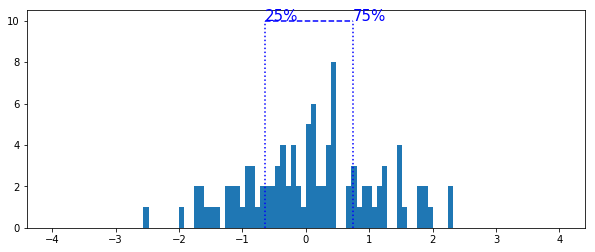

In [ ]:
plt.figure(figsize=(10,4))
plt.hist(x, bins=100,range=(-4,4))
#25, 75パーセンタイル（第1四分位，第3四分位）を求める
q75, q25 = np.percentile(x, [75 ,25])

plt.vlines(q25, 0, 10, "blue", linestyles='dotted')
plt.vlines(q75, 0, 10, "blue", linestyles='dotted')
plt.text(q25, 10, "25%", size = 15, color = "blue")
plt.text(q75, 10, "75%", size = 15, color = "blue")
plt.hlines(10, q25, q75, "blue", linestyles='dashed')


####標準偏差

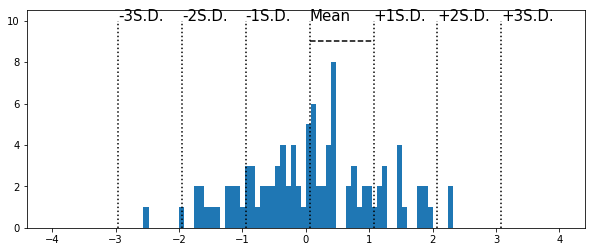

In [ ]:
plt.figure(figsize=(10,4))
plt.hist(x, bins=100,range=(-4,4))

plt.vlines(x.mean(), 0, 10, "black", linestyles='dotted')
plt.text(x.mean(), 10, "Mean", size = 15, color = "black")

plt.vlines(x.mean()+x.std(), 0, 10, "black", linestyles='dotted')
plt.text(x.mean()+x.std(), 10, "+1S.D.", size = 15, color = "black")

plt.vlines(x.mean()+2*x.std(), 0, 10, "black", linestyles='dotted')
plt.text(x.mean()+2*x.std(), 10, "+2S.D.", size = 15, color = "black")

plt.vlines(x.mean()+3*x.std(), 0, 10, "black", linestyles='dotted')
plt.text(x.mean()+3*x.std(), 10, "+3S.D.", size = 15, color = "black")

plt.vlines(x.mean()-x.std(), 0, 10, "black", linestyles='dotted')
plt.text(x.mean()-x.std(), 10, "-1S.D.", size = 15, color = "black")

plt.vlines(x.mean()-2*x.std(), 0, 10, "black", linestyles='dotted')
plt.text(x.mean()-2*x.std(), 10, "-2S.D.", size = 15, color = "black")

plt.vlines(x.mean()-3*x.std(), 0, 10, "black", linestyles='dotted')
plt.text(x.mean()-3*x.std(), 10, "-3S.D.", size = 15, color = "black")

plt.hlines(9, x.mean(), x.mean()+x.std(), "black", linestyles='dashed')


####正規分布の四分位

$ p(x| \mu , \sigma ) = \frac{1}{\sigma \sqrt{2 \pi}} \cdot \exp \big( - \frac{(x - \mu)^{2}}{2 \sigma ^{2}} \big) $

ただし標準正規分布では

$\mu=0$

$\sigma=1$

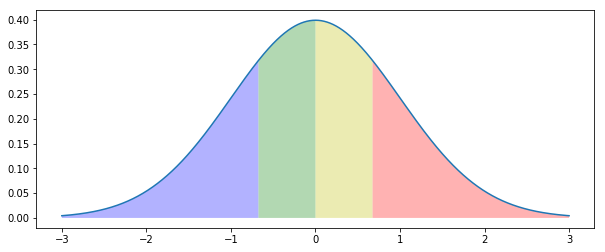

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.001)

a = x[ x <= stats.norm.ppf(q=0.25, loc=0, scale=1)]
b = x[(x > stats.norm.ppf(q=0.25, loc=0, scale=1)) & (x <= stats.norm.ppf(q=0.50, loc=0, scale=1))]
c= x[ (x > stats.norm.ppf(q=0.50, loc=0, scale=1)) & (x <= stats.norm.ppf(q=0.75, loc=0, scale=1))]
d =x[ x > stats.norm.ppf(q=0.75, loc=0, scale=1)]

plt.figure(figsize=(10,4))
p = stats.norm.pdf(x, scale=1)
plt.plot(x, p)

plt.fill_between(a,0,stats.norm.pdf(a, scale=1),facecolor='b',alpha=0.3)
plt.fill_between(b,0,stats.norm.pdf(b, scale=1),facecolor='g',alpha=0.3)
plt.fill_between(c,0,stats.norm.pdf(c, scale=1),facecolor='y',alpha=0.3)
plt.fill_between(d,0,stats.norm.pdf(d, scale=1),facecolor='r',alpha=0.3)

####正規分布と標準偏差（σ: シグマ）


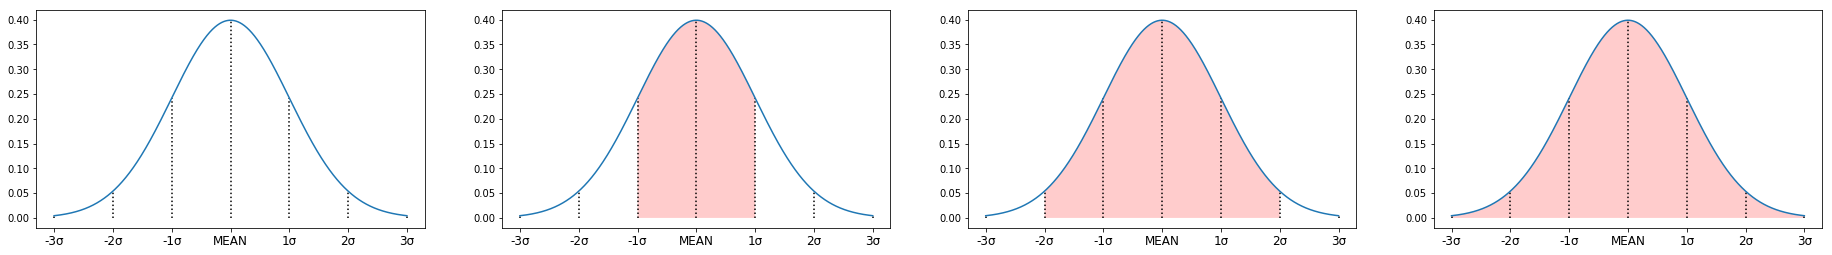

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,4,figsize=(32,4))
x = np.arange(-3, 3, 0.001)
p = stats.norm.pdf(x, scale=1)

for j in range(4):
  ax[j].plot(x, p)
  ax[j].set_xticks([-3, -2, -1, 0, 1, 2, 3])
  ax[j].set_xticklabels(['-3σ', '-2σ', '-1σ', 'MEAN', '1σ', '2σ', '3σ'],fontsize='large') 
  for i in range(-3,4):
    ax[j].vlines(i, 0, stats.norm.pdf(i), "black", linestyles='dotted')
  ax[j].fill_between(x[(x >-j) &  (x<= j)],0,stats.norm.pdf(x[(x >-j) &  (x<= j)], scale=1),facecolor='r',alpha=0.2)

##平均値や標準偏差の利用

###zスコア（標準得点）

####学力偏差値（正規分布を仮定）

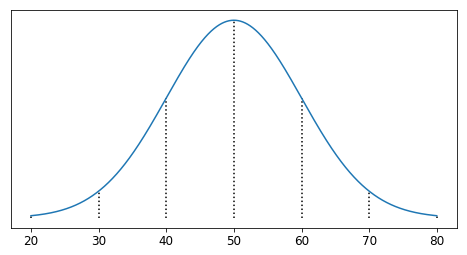

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(8,4))
x = np.arange(-3, 3, 0.001)
p = stats.norm.pdf(x, scale=1)

ax.plot(x, p)
ax.set_xticks([-3, -2, -1, 0, 1, 2, 3])
ax.set_xticklabels(['20', '30', '40', '50', '60', '70', '80'],fontsize='large') 
ax.set_yticks([])
for i in range(-3,4):
    ax.vlines(i, 0, stats.norm.pdf(i), "black", linestyles='dotted')

テストの点数X={10, 20, 30, 40, 50}からそれぞれの受験者の「学力偏差値」を求めてみよう．

$学力偏差値=zスコア×10 + 50$

In [ ]:
x = np.array([10, 20, 30, 40, 50])
stats.zscore(x)*10 + 50

array([35.85786438, 42.92893219, 50.        , 57.07106781, 64.14213562])

**仮想データを作成し偏差値を求める**

平均50点，標準偏差5点のうそこデータを作成するソース

,sugaku,eigo
count,40.000000,40.000000
mean,50.700000,69.450000
std,5.034242,14.415003
min,39.000000,34.000000
25%,48.000000,61.000000
50%,51.000000,71.000000
75%,54.250000,78.000000
max,62.000000,100.000000


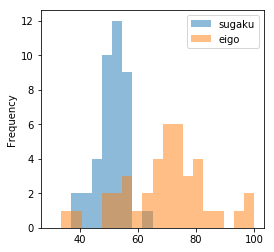

In [ ]:
import numpy.random as rnd
import pandas as pd

#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(1234)
num_students = 40
#randnは標準正規分布（平均=0, 分散=1）に従う乱数を所定の個数発生させる関数
sugaku = (np.random.randn(num_students) * 5 + 50).round()  #平均50点，標準偏差5点の得点を発生(数学)
eigo = (np.random.randn(num_students) * 15 + 70).round()  #平均50点，標準偏差15点の得点を発生（英語）

df = pd.DataFrame({ 'sugaku' : sugaku ,'eigo'   : eigo})
df.head()
df.plot( bins=20, alpha=0.5, figsize=(4,4), kind='hist', legend=True,range=(30,100))
df.describe()

上記のテストで数学が60点,英語が80点の人の学力偏差値

In [ ]:
hensati_sugaku = (60 - df['sugaku'].mean())/df['sugaku'].std() *10 + 50
print("数学偏差値は%.1fです" %hensati_sugaku)

hensati_eigo = (80 - df['eigo'].mean())/df['eigo'].std() *10 + 50
print("英語偏差値は%.1fです" %hensati_eigo)

数学偏差値は68.5です
英語偏差値は57.3です


####95%安全在庫

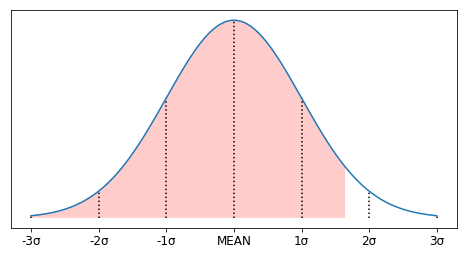

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
x = np.arange(-3, 3, 0.001)
p = stats.norm.pdf(x, scale=1)

ax.plot(x, p)
ax.set_xticks([-3, -2, -1, 0, 1, 2, 3])
ax.set_xticklabels(['-3σ', '-2σ', '-1σ', 'MEAN', '1σ', '2σ', '3σ'],fontsize='large') 
ax.set_yticks([])
for i in range(-3,4):
    ax.vlines(i, 0, stats.norm.pdf(i), "black", linestyles='dotted')
ax.fill_between(x[(x <stats.norm.ppf(q=0.95, loc=0, scale=1))],0,stats.norm.pdf(x[(x <stats.norm.ppf(q=0.95, loc=0, scale=1))], scale=1),facecolor='r',alpha=0.2)

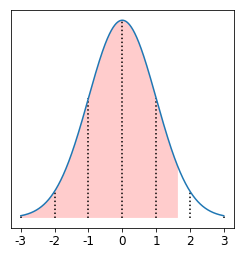

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
x = np.arange(-3, 3, 0.001)
p = stats.norm.pdf(x, scale=1)

ax.plot(x, p)
ax.set_xticks([-3, -2, -1, 0, 1, 2, 3])
ax.set_xticklabels(['-3', '-2', '-1', '0', '1', '2', '3'],fontsize='large') 
ax.set_yticks([])
for i in range(-3,4):
    ax.vlines(i, 0, stats.norm.pdf(i), "black", linestyles='dotted')
ax.fill_between(x[(x <stats.norm.ppf(q=0.95, loc=0, scale=1))],0,stats.norm.pdf(x[(x <stats.norm.ppf(q=0.95, loc=0, scale=1))], scale=1),facecolor='r',alpha=0.2)

In [ ]:
#1日の平均需要のσ = 5のときの1日の95％安全在庫
sigma = 5
anzen_zaiko =  sigma * stats.norm.ppf(q=0.95, loc=0, scale=1)
print(anzen_zaiko)

8.224268134757361


####x管理図

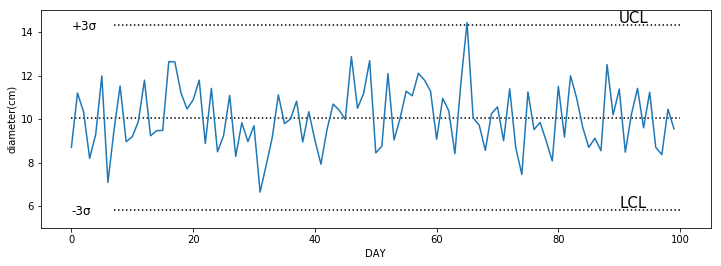

In [ ]:
#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(123)
num_samples = 100
#randnは標準正規分布（平均=0, 分散=1）に従う乱数を所定の個数発生させる関数
diameter = np.random.randn(num_samples) *1.2  + 10  #平均10，標準偏差1.2点の得点を発生(数学)

diameter[65] = 10 + 1.2 *3.7 #うそこデータの挿入（異常値）

plt.figure(figsize=(12,4))
plt.plot(diameter)
plt.ylim(5 , 15)
plt.xlabel('DAY')
plt.ylabel('diameter(cm)')

plt.hlines(diameter.mean() + diameter.std() *3, 7 , num_samples, "black", linestyles='dotted')
plt.hlines(diameter.mean()  - diameter.std() *3, 7, num_samples, "black", linestyles='dotted')
plt.text(90,diameter.mean()  + diameter.std() *3 +.1, "UCL", size = 15, color = "black")
plt.text(90,diameter.mean()  - diameter.std() *3+.1, "LCL", size = 15, color = "black")

plt.text(0,diameter.mean()  + diameter.std() *3 -.2, "+3σ", size = 12, color = "black")
plt.text(0,diameter.mean()  - diameter.std() *3-.2, "-3σ", size = 12, color = "black")

plt.hlines(diameter.mean() , 0, num_samples, "black", linestyles='dotted')


##授業資料作成用の図

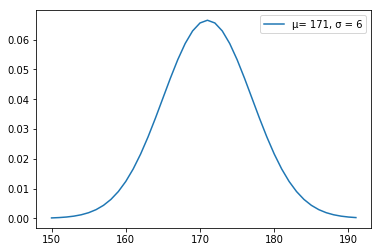

In [ ]:
#男性の身長の分布
x = np.arange(150, 192, 1)

p = stats.norm.pdf(x, loc=171, scale=6)
plt.plot(x, p, label="μ= 171, σ = 6")

plt.legend(loc = 'upper right')


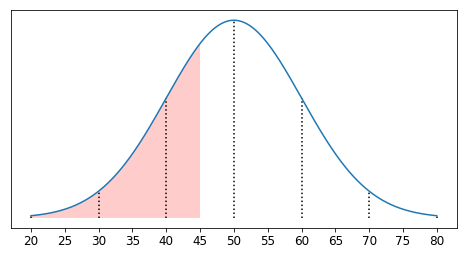

In [ ]:
#偏差値45
fig, ax = plt.subplots(1,1,figsize=(8,4))
x = np.arange(-3, 3, 0.001)
p = stats.norm.pdf(x, scale=1)

ax.plot(x, p)
ax.set_xticks([-3, -2.5, -2,  -1.5, -1, -0.5,0, 0.5, 1, 1.5, 2,2.5, 3])
ax.set_xticklabels(['20','25',  '30','35', '40','45', '50','55', '60', '65','70','75', '80'],fontsize='large') 
ax.set_yticks([])
for i in range(-3,4):
    ax.vlines(i, 0, stats.norm.pdf(i), "black", linestyles='dotted')
ax.fill_between(x[(x < -0.5)],0,stats.norm.pdf(x[(x < -.5)], scale=1),facecolor='r',alpha=0.2)

###平均の異なる分布とばらつき,歪み尖度の異なる分布

####平均の異なる分布

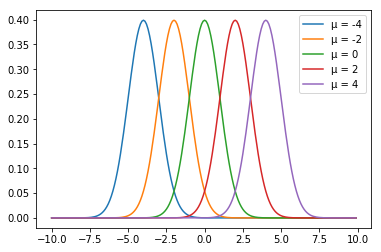

In [ ]:
# 統計分析用のサブモジュールをstats（statistics（統計学）の略）として使えるようにする
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


x = np.arange(-10, 10, 0.1)

for i in np.arange(-4, 6, 2):
    p = stats.norm.pdf(x-i, scale=1)
    plt.plot(x, p, label="μ = "+str(i))

plt.legend(loc = 'upper right')


####ばらつきの異なる分布

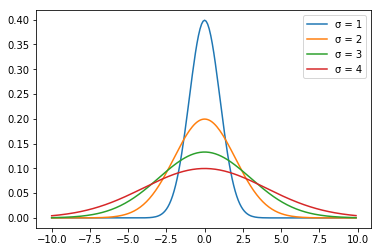

In [ ]:
x = np.arange(-10, 10, 0.1)

for i in range(1, 5):
    p = stats.norm.pdf(x, scale=i)
    plt.plot(x, p, label="σ = "+str(i))

plt.legend(loc = 'upper right')



####t分布

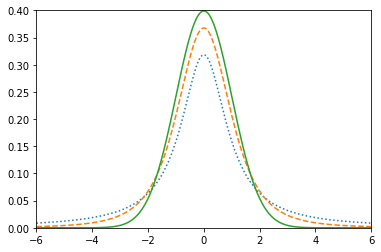

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-6, 6, 1000)
 
linestyles = [':', '--', '-.', '-']
deg_of_freedom = [1, 3]
for k, ls in zip(deg_of_freedom, linestyles):
  plt.plot(x, stats.t.pdf(x, k), linestyle=ls, label=r'$k=%i$' % k)
 
plt.plot(x, stats.norm.pdf(x, 0, 1), linestyle='-', label="Standard Normal Distribution")
 
plt.xlim(-6, 6)
plt.ylim(0, 0.4)
 
#plt.legend()
plt.show()

####ベータ分布

(0, 1)

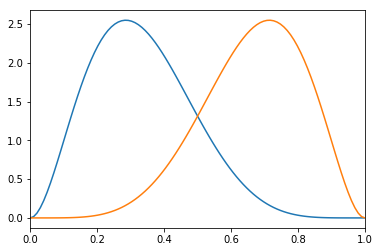

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1,100)
for a,b in zip([3,6], [6,3]):
    beta_pdf = stats.beta.pdf(x, a, b)
    plt.plot(x,beta_pdf)
plt.xlim([0,1])

####コーシー分布

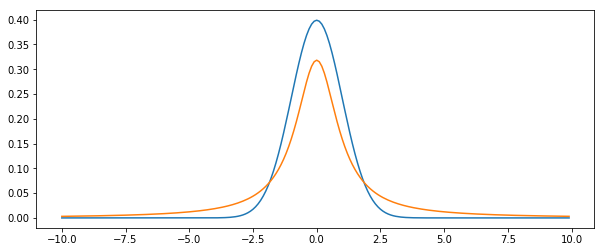

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 0.1)

plt.figure(figsize=(10,4))
p = stats.norm.pdf(x, scale=1)
c = stats.cauchy.pdf(x)
plt.plot(x, p)
plt.plot(x, c)

###正規分布のヒストグラム

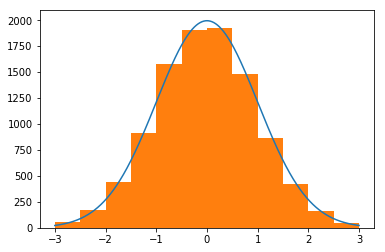

array([-0.41675785, -0.05626683, -2.1361961 , ..., -0.00992378,
       -0.21786254,  2.00471618])

In [ ]:
import numpy.random as rnd
import matplotlib.pyplot as plt
 
#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(2)
#randnは標準正規分布（平均=0, 分散=1）に従う乱数を所定の個数発生させる関数
data = np.random.randn(10000)

x = np.arange(-3, 3, 0.001)
p = stats.norm.pdf(x, scale=1)

plt.plot(x, p*5000) #5000はそれっぽく見える数に合わせているだけ
plt.hist(data, range=(-3, 3), bins=12)
plt.show()
data